# Measuring Tracking Error: A Practical Guide with Python

In the world of finance and investing, understanding how closely an investment tracks its benchmark index is crucial for evaluating performance and risk. This concept is known as tracking error. In this blog post, we'll delve into the tracking error of QQQ and SPY using weekly returns. We'll discuss why this metric matters, how it's calculated, and provide you with a full suite of examples using Python to analyze these ETFs.

## What is Tracking Error and Why It Matters

Tracking error is a measure of how closely a fund follows its benchmark index. For investors and portfolio managers, this metric is crucial as it helps in assessing the risk associated with a fund's performance relative to its benchmark. If you're using index funds or ETFs like QQQ and SPY, tracking error gives you insights into how accurately these funds replicate their respective indices. For this article we will use the same metric to compare 2 ETFs, with a 
### Performance Evaluation

Tracking error provides a clear picture of how well a fund replicates its benchmark. If the tracking error is low, the fund closely follows the index, making it a reliable choice for passive investors.
### Risk Assessment

It helps investors understand the consistency of a fund's returns relative to its benchmark. A high tracking error indicates higher risk and volatility, signaling investors to tread with caution.
### Portfolio Management

Fund managers use tracking error to make informed decisions about rebalancing their portfolios. By minimizing tracking error, they can align their funds more closely with the benchmark, offering stable returns.

## Key Formula and Parameters

Tracking error is essentially the standard deviation of the difference between the portfolio returns and the benchmark returns over a specified period. The formula for tracking error is:

$$
 \text{Tracking Error} = \sqrt{ \frac{1}{N-1} \sum_{i=1}^{N} (R_{p,i} - R_{b,i})^2 } 
$$

Where:

- \(R_{p,i}\) = Return of the portfolio (e.g., QQQ) for period \(i\)
- \(R_{b,i}\) = Return of the benchmark index (e.g., SPY) for period \(i\)
- \(N\) = Total number of periods (weekly returns in our case)

This formula calculates the standard deviation of the difference between portfolio returns and benchmark returns. A lower tracking error indicates closer alignment, whereas a higher tracking error indicates greater deviation.

## Calculating Weekly Returns and Tracking Error

To get started, make sure you have the following Python libraries installed:

```bash
pip install yfinance pandas numpy matplotlib
```

### Download Historical Data
We'll use the `yfinance` library to download the historical weekly data for QQQ and SPY.

In [1]:
%%capture
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical data for QQQ and SPY
qqq = yf.download('QQQ', start='2015-01-01', end='2024-06-30', interval='1wk')
spy = yf.download('SPY', start='2015-01-01', end='2024-06-30', interval='1wk')

# Calculate weekly returns
qqq['Weekly Return'] = qqq['Adj Close'].pct_change().dropna()
spy['Weekly Return'] = spy['Adj Close'].pct_change().dropna()

### Calculate Tracking Error
With our weekly returns calculated, we can now compute the tracking error.

In [2]:
# Align the indexes of QQQ and SPY weekly returns
plt.style.use('ddm-chart.mplstyle')
combined = pd.concat([qqq['Weekly Return'], spy['Weekly Return']], axis=1, join='inner')
combined.columns = ['QQQ Return', 'SPY Return']

# Calculate tracking error
combined['Tracking Error'] = combined['QQQ Return'] - combined['SPY Return']
tracking_error = np.std(combined['Tracking Error']) * np.sqrt(52)  # Annualize the tracking error

## Visualizing Historical Performance and Tracking Error

Visuals often provide the best insight into data trends and relationships. Let's create various charts to help us understand the performance, volatility, and tracking error of QQQ and SPY.

### Historical Weekly Prices
A line chart showcasing the historical weekly closing prices of QQQ and SPY over the past five years provides a visual representation of performance trends. This chart allows investors to quickly identify trends, correlations, and divergence periods between the two funds.

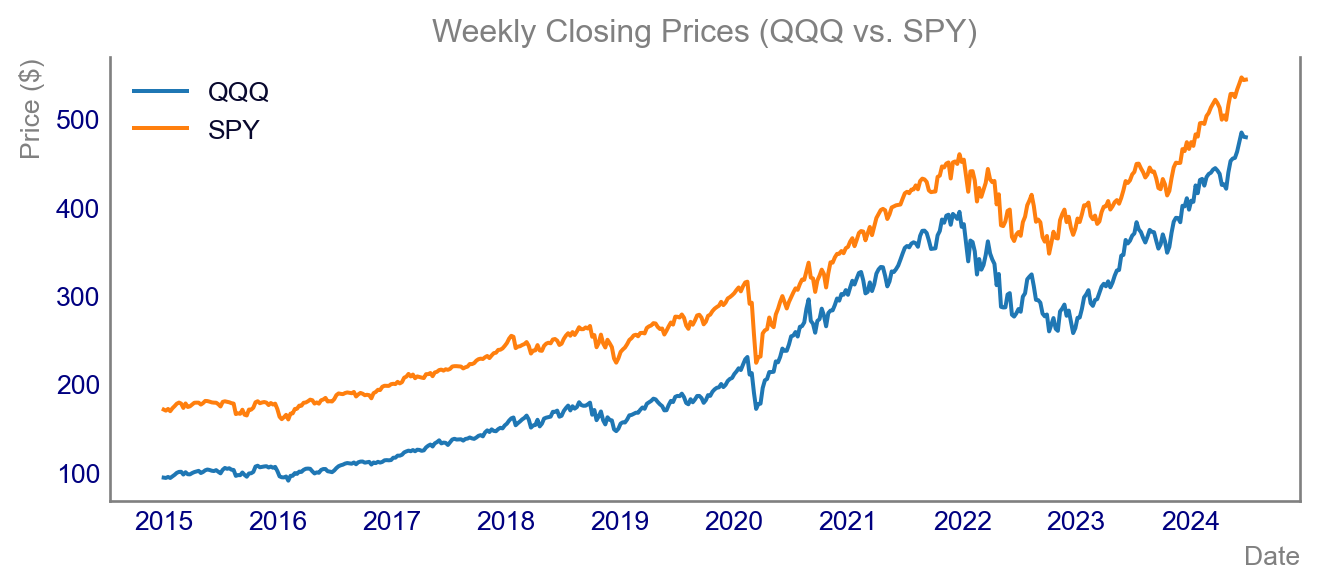

In [3]:
plt.style.use('getting_started-chart.mplstyle')
fig, ax = plt.subplots()

# Plot weekly closing prices
ax.plot(qqq['Adj Close'], label='QQQ')
ax.plot(spy['Adj Close'], label='SPY')
ax.set_title('Weekly Closing Prices (QQQ vs. SPY)')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend()
plt.show()

### Weekly Returns Bar Chart
A bar chart displaying the weekly returns of QQQ and SPY side-by-side for the same five-year period illustrates the short-term performance comparison. This view makes it easier to observe how often QQQ's returns outperformed or underperformed SPY during the specified timeframe.

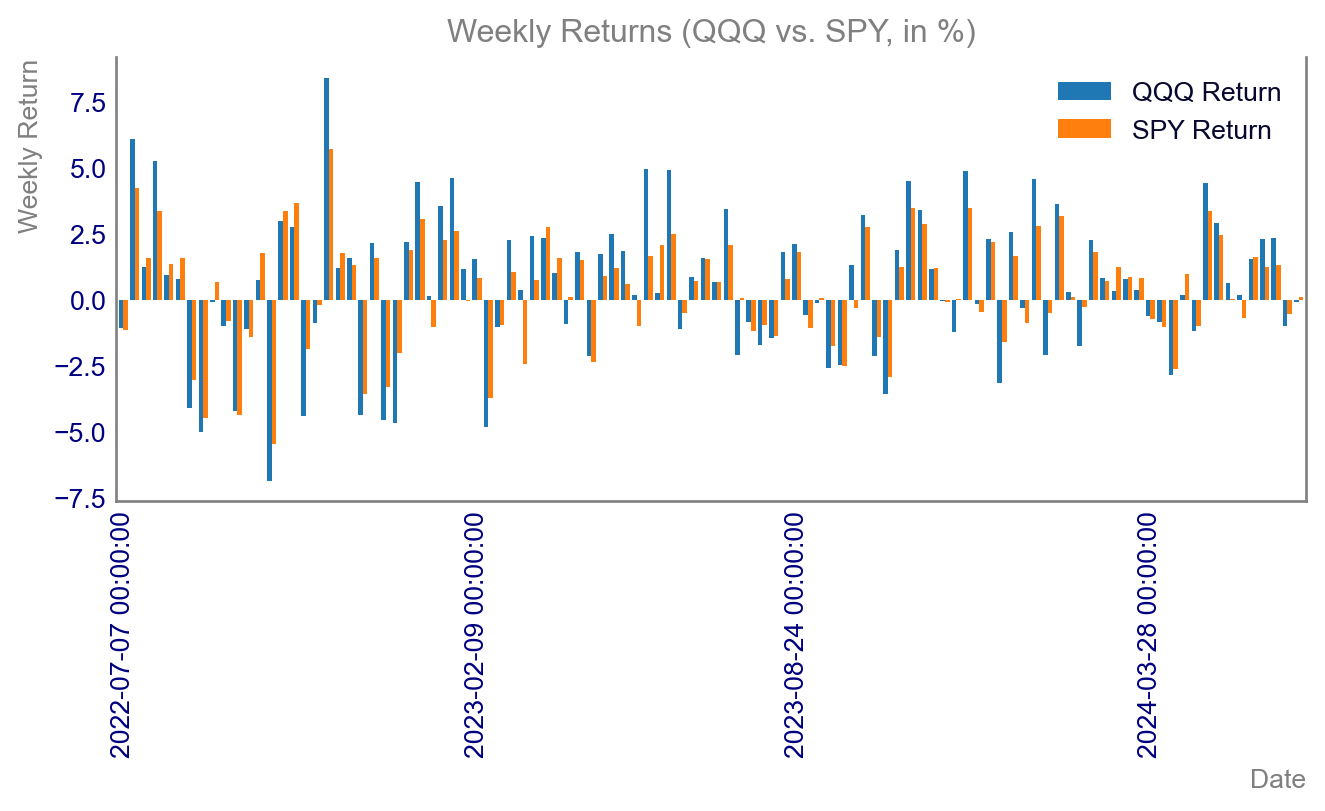

In [4]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
plt.style.use('getting_started-chart.mplstyle')

# Plot weekly returns
combined[['QQQ Return', 'SPY Return']].tail(104).multiply(100).plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Weekly Returns (QQQ vs. SPY, in %)')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

ax.set_ylabel('Weekly Return')
plt.show()

### Scatter Plot of Weekly Returns
A scatter plot of weekly returns for QQQ against SPY helps depict the relationship between the returns of these two ETFs. By analyzing the data points' distribution, investors can assess the levels of correlation and volatility between the two funds.

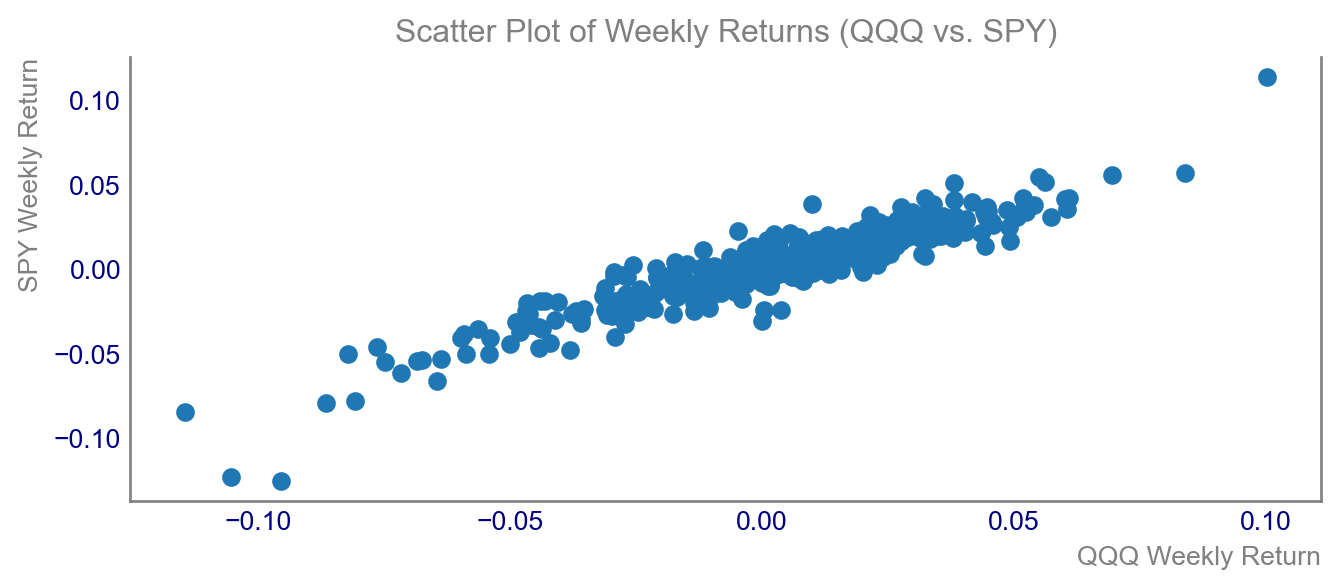

In [5]:
fig, ax = plt.subplots()
plt.style.use('getting_started-chart.mplstyle')

# Scatter plot of weekly returns
ax.scatter(combined['QQQ Return'], combined['SPY Return'])
ax.set_title('Scatter Plot of Weekly Returns (QQQ vs. SPY)')
ax.set_xlabel('QQQ Weekly Return')
ax.set_ylabel('SPY Weekly Return')
plt.show()

### Histogram of Weekly Returns
A histogram of the weekly returns for QQQ and SPY provides insights into the distribution of returns over the displayed five-year period. This visualization helps highlight the frequency of different return sizes and indicates whether one ETF exhibited more consistent performance.

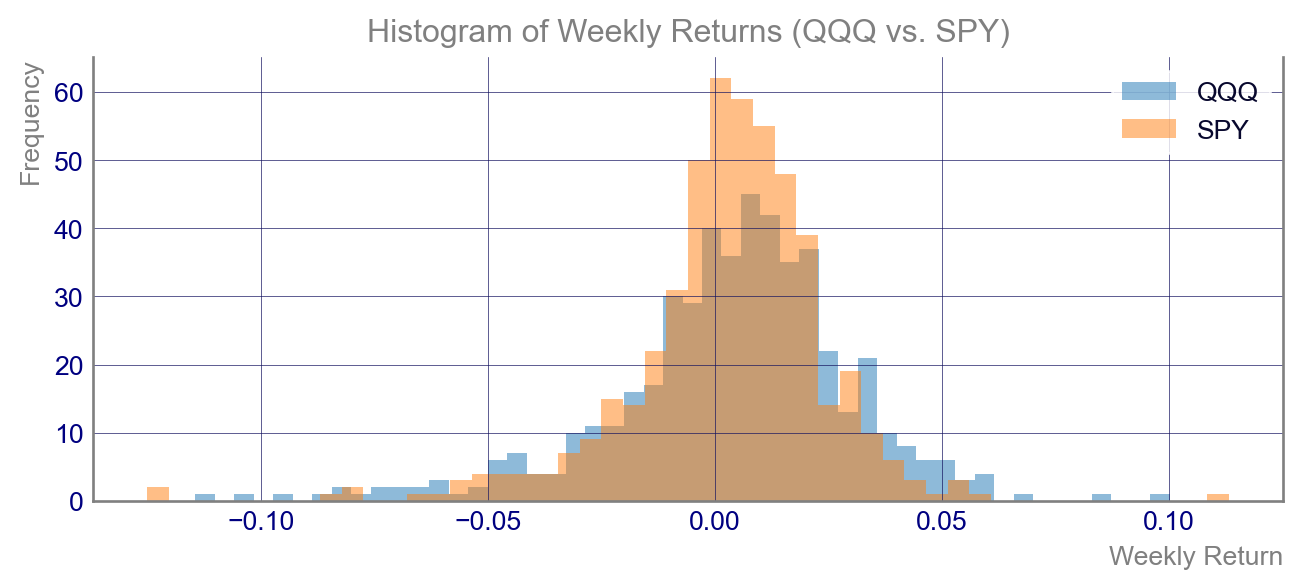

In [6]:
fig, ax = plt.subplots()
plt.style.use('getting_started-chart.mplstyle')

# Histogram of weekly returns
combined['QQQ Return'].hist(ax=ax, alpha=0.5, bins=50, label='QQQ')
combined['SPY Return'].hist(ax=ax, alpha=0.5, bins=50, label='SPY')
ax.set_title('Histogram of Weekly Returns (QQQ vs. SPY)')
ax.set_xlabel('Weekly Return')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

### Rolling Standard Deviation of Weekly Returns
A chart showing the rolling standard deviation of weekly returns for QQQ and SPY illustrates the volatility of each ETF over time. This visualization highlights periods of high and low volatility, essential for understanding risk dynamics and how closely funds track their benchmarks.

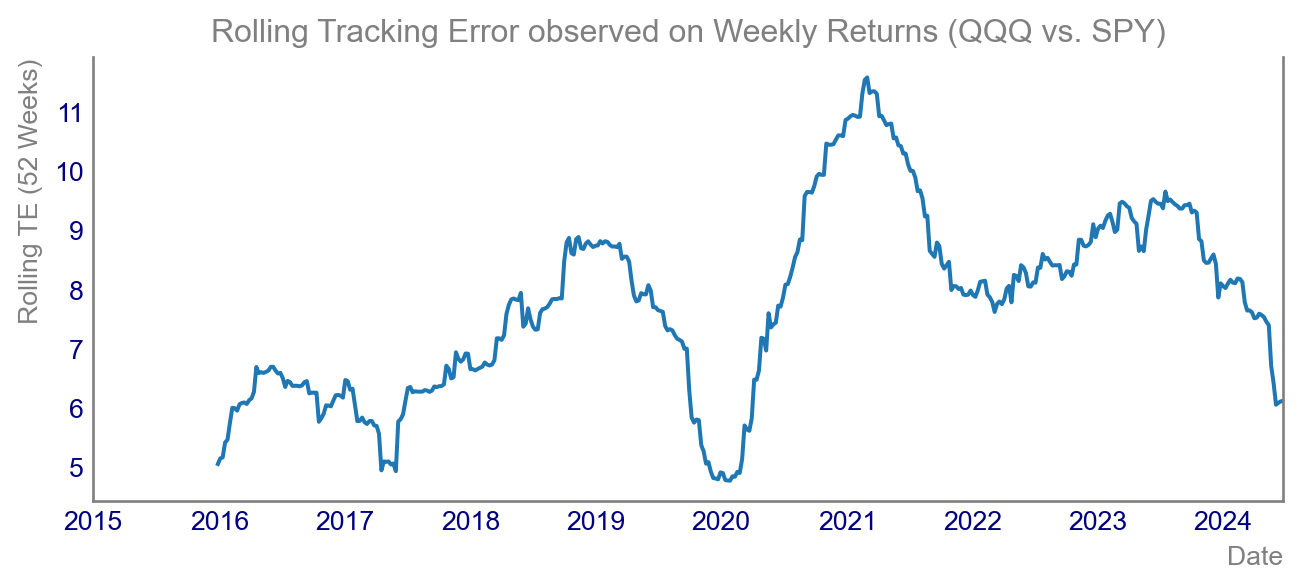

In [7]:
fig, ax = plt.subplots()
plt.style.use('getting_started-chart.mplstyle')

# Calculate rolling standard deviation
rolling_std_dev = (combined['QQQ Return'] - combined['SPY Return']).rolling(window=52).std().multiply(52**0.5).multiply(100)

# Plot rolling standard deviation
rolling_std_dev.plot(ax=ax)
ax.set_title('Rolling Tracking Error observed on Weekly Returns (QQQ vs. SPY)')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling TE (52 Weeks)')
plt.show()